# MOHAMMED REHAN
DATA SCIENCE INTERN@CODSOFT (ID:CS07WX72568)

TASK-02 MOVIE RATING PREDICTION WITH PYTHON

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
#reading dataset
md=pd.read_csv(r"C:\datasets\IMDb Movies India.csv", encoding='ISO-8859-1')
md.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
md.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
md.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# clearing null values rows

In [6]:
md.dropna(inplace=True)

In [7]:
md

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [8]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [9]:
md.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [10]:
md.drop(['Actor 1','Actor 2','Actor 3','Director','Name','Genre'],axis=1,inplace=True)

In [11]:
md['Year'] = md['Year'].str.extract('(\d+)').astype(float)
md['Duration'] = md['Duration'].str.extract('(\d+)').astype(float)

In [12]:
md.dtypes

Year        float64
Duration    float64
Rating      float64
Votes        object
dtype: object

In [13]:
md.columns

Index(['Year', 'Duration', 'Rating', 'Votes'], dtype='object')

In [14]:
md

,Year,Duration,Rating,Votes
1,2019.0,109.0,7.0,8
3,2019.0,110.0,4.4,35
5,1997.0,147.0,4.7,827
6,2005.0,142.0,7.4,"1,086"
8,2012.0,82.0,5.6,326
...,...,...,...,...
15493,2015.0,115.0,6.1,408
15494,2001.0,153.0,6.2,"1,496"
15503,1989.0,125.0,5.8,44
15505,1999.0,129.0,4.5,655


In [15]:
md.shape

(5659, 4)

In [16]:
md.corr()

,Year,Duration,Rating
Year,1.000000,-0.327567,-0.204642
Duration,-0.327567,1.000000,0.001839
Rating,-0.204642,0.001839,1.000000


# HEATMAP

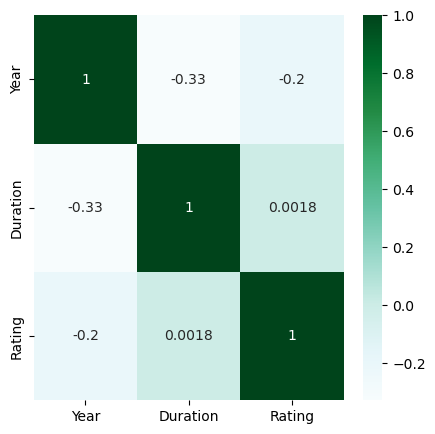

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(md.corr(),cmap='BuGn',annot=True)
plt.show()

# TRAINING DATASET

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
predict='Rating'
features=['Year','Duration','Rating']

x=np.array(md[features].drop(columns=[predict]))
y=np.array(md[predict])

In [20]:
x.shape

(5659, 2)

In [21]:
y.shape

(5659,)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,y_train.shape,y_test.shape,x_test.shape

((4527, 2), (4527,), (1132,), (1132, 2))

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
model.intercept_

39.13863756283962

In [26]:
model.coef_

array([-0.01634141, -0.00467139])

In [27]:
y_pred=model.predict(x_test)
x_test

array([[1990.,  159.],
       [2014.,   93.],
       [1992.,  132.],
       ...,
       [1998.,  154.],
       [1999.,  179.],
       [1971.,  100.]])

In [28]:
model.score(x_test,y_pred)

1.0

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.04057160519776981

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
print('mean absolute percentage error:',mean_absolute_percentage_error(y_test,y_pred))

mean absolute percentage error: 0.2147215241043122
